# Churn Tree Classification Template

## Notebook for Decision Tree/Random Forest/Gradient Boost

**=================================================================================================================**

## Project Description

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited


## Data Tasks

### 1) Understand the shape of the data (Histograms, box plots, etc.)

### 2) Data Cleaning 

### 3) Data Exploration

### 4) Feature Engineering 

### 5) Data Preprocessing for Model

### 6) Basic Model Building 

### 7) Model Tuning 

### 8) Ensemble Model Building 

### 9) Results 

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import datetime
from datetime import datetime, timedelta, date

import scipy
from scipy import stats
from scipy.stats import zscore
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, Binarizer, OrdinalEncoder

from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config

set_config(transform_output="pandas")

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

# from sklearn.feature_selection import f_classif, chi2, RFE, RFECV
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
# from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.inspection import permutation_importance

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay 
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance



import feature_engine

from feature_engine.selection import (DropConstantFeatures, DropDuplicateFeatures, 
                                      DropCorrelatedFeatures, SmartCorrelatedSelection)
from feature_engine.selection import SelectBySingleFeaturePerformance, SelectByShuffling, RecursiveFeatureElimination
from feature_engine.selection import RecursiveFeatureAddition

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : '20'}
plt.rc('font' , **font)

import warnings
warnings.filterwarnings('ignore')

# import pickle
# from pickle import dump, load


# PyCaret
from pycaret.classification import *


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

# Ensure results are reproducible
random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [ ]:
data_descriptions = pd.read_csv('data_descriptions.csv')
data_descriptions

**=================================================================================================================**

## Data Quick Glance

In [2]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.dtypes.value_counts()

In [ ]:
# Descriptive Statistical Analysis
df.describe(include="all")

In [ ]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

In [ ]:
# Descriptive Statistical Analysis
df.describe(include="object")

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
# Check class balance
df['churn'].value_counts().to_frame()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

**=================================================================================================================**

## Load Test Set

In [ ]:
testset = pd.read_csv("test.csv")

In [ ]:
testset.head()

In [ ]:
#preprocessor.transform(testset)

In [ ]:
#testdata = preprocessor.transform(testset)

**==================================================================================================================**

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==================================================================================================================**

## Create a small dataset for model training

In [3]:
df = df.sample(frac=0.15, random_state=0)

In [4]:
df.reset_index(drop=True, inplace=True)

In [5]:
df.head()

,accountage,monthlycharges,totalcharges,subscriptiontype,paymentmethod,paperlessbilling,contenttype,multideviceaccess,deviceregistered,viewinghoursperweek,averageviewingduration,contentdownloadspermonth,genrepreference,userrating,supportticketspermonth,gender,watchlistsize,parentalcontrol,subtitlesenabled,churn
0,13,19.71,256.26,Basic,Credit card,No,Both,No,Tablet,6.48,50.03,33,Action,1.18,6,Male,7,Yes,No,0
1,57,9.25,527.13,Premium,Bank transfer,No,Both,No,Mobile,17.04,44.53,14,Action,4.57,8,Male,7,Yes,Yes,0
2,99,9.36,926.48,Basic,Bank transfer,No,Both,Yes,Computer,14.30,43.81,31,Fantasy,1.95,0,Male,17,No,No,0
3,28,13.17,368.90,Basic,Mailed check,Yes,Movies,No,Mobile,6.88,57.23,49,Drama,1.41,2,Female,7,Yes,Yes,0
4,7,18.95,132.63,Standard,Bank transfer,Yes,Both,Yes,Tablet,27.01,95.18,44,Fantasy,3.99,7,Female,11,Yes,No,0


In [6]:
df.shape

(36568, 20)

**=================================================================================================================**

## Train Test Split

In [ ]:
df.shape

In [ ]:
df.head(1)

In [7]:
X = df.iloc[:,0:19]
y = df.iloc[:,19]

In [8]:
X.values, y.values

(array([[13, 19.71252476, 256.2628218, ..., 7, 'Yes', 'No'],
        [57, 9.247976928, 527.1346849, ..., 7, 'Yes', 'Yes'],
        [99, 9.358378775, 926.4794987, ..., 17, 'No', 'No'],
        ...,
        [107, 11.93021323, 1276.532816, ..., 9, 'Yes', 'Yes'],
        [108, 11.89919793, 1285.113376, ..., 8, 'No', 'Yes'],
        [35, 8.658608623, 303.0513018, ..., 24, 'Yes', 'No']], dtype=object),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29254, 19), (7314, 19), (29254,), (7314,))

In [ ]:
Counter(y_train)

**=================================================================================================================**

# Model Training

## Data Pipelines

Data Pipelines simplify the steps of processing the data. We use the module <code>Pipeline</code> to create a pipeline. 
`Pipeline` lets you chain together multiple operators on your data that both have a `fit` method.

### Combine multiple processing steps into a `Pipeline`

A pipeline contains a series of steps, where a step is ("name of step", actual_model). The "name of step" string is only used to help you identify which step you are on, and to allow you to specify parameters at that step.  

In [ ]:
# Declare preprocessing functions

#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#ohe = OneHotEncoder()
#oe = OrdinalEncoder()
#ss = StandardScaler()
#mm = MinMaxScaler()

In [ ]:
list(df.select_dtypes(include=["int64","float64"]))

In [ ]:
list(df.select_dtypes(include=["bool","object"]))

In [11]:
dropcols = ['paperlessbilling', 'contenttype', 'multideviceaccess', 'deviceregistered','genrepreference', 
            'gender', 'parentalcontrol', 'subtitlesenabled']

In [12]:
numcols = ['accountage', 'monthlycharges', 'totalcharges', 'viewinghoursperweek', 'averageviewingduration',
 'contentdownloadspermonth', 'userrating', 'supportticketspermonth', 'watchlistsize']

In [13]:
catcols = ['subscriptiontype', 'paymentmethod']

In [14]:
# We create the preprocessing pipelines for both
# numerical and categorical data


drop_transformer = ColumnTransformer(transformers=
                                    ("dropcolumns", "drop", dropcols)
                                    )

numeric_transformer = Pipeline(steps=[
                             # ("scalar", StandardScaler()),
                              ("minmax", MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
                                  ("onehot", OneHotEncoder(sparse_output=False, drop='if_binary')),
    
                                  #("ordinal", OrdinalEncoder(categories='auto', handle_unknown="error"))
   
])

In [15]:
preprocessor = ColumnTransformer(
               transformers=[
                           ("dropcolumns", "drop", dropcols),
                           ("numerical", numeric_transformer, numcols),
                           ("categorical", categorical_transformer, catcols),
                   
                            ],
               remainder="passthrough",
               verbose_feature_names_out=False)

In [ ]:
preprocessor = ColumnTransformer(
               transformers=[
                           ("dropcolumns", "drop", ["id"]),
                           ("numerical", numeric_transformer, numcols),
                           #("categorical", categorical_transformer, catcols),
                   
                            ],
               remainder="drop",
               verbose_feature_names_out=False)

In [ ]:
# Check features transformation (Train Set)

preprocessor.fit_transform(X_train)

In [ ]:
# Check features transformation (Test Set)

preprocessor.transform(X_test)

In [ ]:
train = preprocessor.fit_transform(X_train)
train.describe()

**=================================================================================================================**

## Decision Tree Model (Baseline)

The `DecisionTreeClassifier` has many arguments (model hyperparameters) that can be customized and eventually tune the generated decision tree classifiers. Among these arguments, there are three commonly tuned arguments as follows:
- criterion: `gini` or `entropy`, which specifies which criteria to be used when splitting a tree node
- max_depth: a numeric value to specify the max depth of the tree. Larger tree depth normally means larger model complexity
- min_samples_leaf: The minimal number of samples in leaf nodes. Larger samples in leaf nodes will tend to generate simpler trees


In [17]:
dtpipeline = Pipeline(steps=[
                        ("preprocessor", preprocessor),
                        ("decisiontree", DecisionTreeClassifier(random_state=0))
                    
])

In [18]:
dtpipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dropcolumns', 'drop',
                                                  ['paperlessbilling',
                                                   'contenttype',
                                                   'multideviceaccess',
                                                   'deviceregistered',
                                                   'genrepreference', 'gender',
                                                   'parentalcontrol',
                                                   'subtitlesenabled']),
                                                 ('numerical',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['accountage',
                                                   'monthlycharges',
                                                   'totalcharges',
                                                   'viewinghoursperweek',
                                                   'averageviewingduration',
                                                   'contentdownloadspermonth',
                                                   'userrating',
                                                   'supportticketspermonth',
                                                   'watchlistsize']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['subscriptiontype',
                                                   'paymentmethod'])],
                                   verbose_feature_names_out=False)),
                ('decisiontree', DecisionTreeClassifier(random_state=0))])

In [19]:
dtpred = dtpipeline.predict(X_test)

In [20]:
dtpred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# Extract the second column of probabilities (class 1) and rename it
dt_predicted_probability = dtpred[:, 1]

In [ ]:
dt_predicted_probability

In [21]:
print("Decision Tree Classifier\n")
print('Accuracy:', '%.3f' % accuracy_score(y_test, dtpred))
print('Precision:', '%.3f' % precision_score(y_test, dtpred))
print('Recall:', '%.3f' % recall_score(y_test, dtpred))
print('F1 Score:', '%.3f' % f1_score(y_test, dtpred))
print('AUC score:', '%3.f' % roc_auc_score(y_test, dtpred))

Decision Tree Classifier

Accuracy: 0.720
Precision: 0.253
Recall: 0.284
F1 Score: 0.268
AUC score:   1


In [ ]:
print("Decision Tree Classifier\n")
print('Accuracy:', '%.3f' % accuracy_score(y_test, dt_predicted_probability))
print('Precision:', '%.3f' % precision_score(y_test, dt_predicted_probability))
print('Recall:', '%.3f' % recall_score(y_test, dt_predicted_probability))
print('F1 Score:', '%.3f' % f1_score(y_test, dt_predicted_probability))
print('AUC score:', '%3.f' % roc_auc_score(y_test, dt_predicted_probability))

**=================================================================================================================**

## Decision Tree Model Evaluation

In [22]:
print(classification_report(y_test, dtpred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5998
           1       0.25      0.28      0.27      1316

    accuracy                           0.72      7314
   macro avg       0.55      0.55      0.55      7314
weighted avg       0.73      0.72      0.73      7314



In [23]:
dtcm = confusion_matrix(y_test, dtpred)
dtcm

array([[4893, 1105],
       [ 942,  374]], dtype=int64)

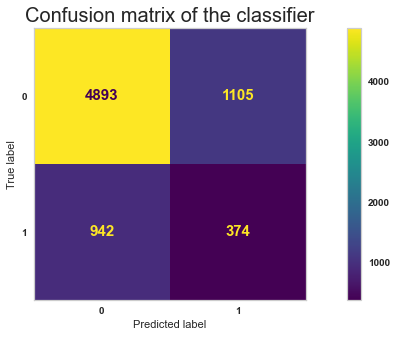

In [24]:
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(15,5))

ConfusionMatrixDisplay.from_estimator(estimator=dtpipeline, X=X_test, y=y_test, ax=ax, 
                                      labels=dtpipeline.classes_, cmap="viridis")

ax.set_title('Confusion matrix of the classifier', size=20)
ax.grid(False)

plt.show()

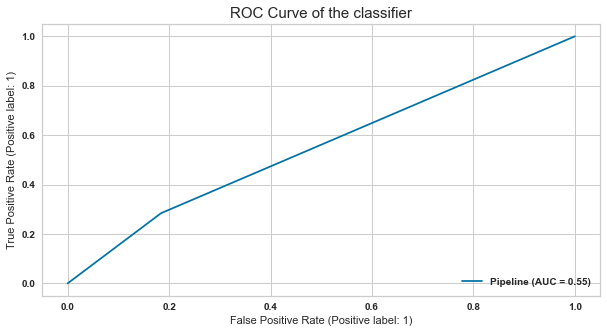

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=dtpipeline, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)
#ax.grid(False)

plt.show()

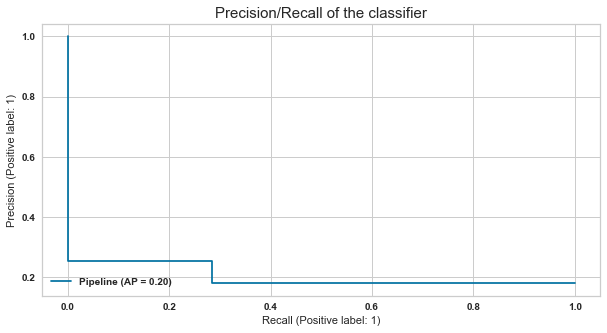

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

PrecisionRecallDisplay.from_estimator(estimator=dtpipeline, X=X_test, y=y_test, ax=ax)
ax.set_title('Precision/Recall of the classifier', size=15)

plt.show()

**=================================================================================================================**

## K-Fold Validation (DT)

In [ ]:
#kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [27]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [28]:
dtcv = cross_validate(estimator=dtpipeline, X=X_train, y=y_train, scoring="roc_auc", cv=skf, n_jobs=2, return_train_score=True)
dtcv

{'fit_time': array([0.43874931, 0.42313242, 0.38539147, 0.35415149, 0.35001612]),
 'score_time': array([0.0156312 , 0.0156312 , 0.01562428, 0.0312407 , 0.01562524]),
 'test_score': array([0.55164783, 0.5633338 , 0.5509428 , 0.55447327, 0.56323397]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [29]:
dtcv["train_score"].mean()

1.0

In [30]:
dtcv["test_score"].mean()

0.5567263340322576

## Cross Validation Score

In [ ]:
cv2 = cross_val_score(estimator=dtpipeline, X=X_train, y=y_train, scoring="roc_auc", cv=skf, n_jobs=2)

In [ ]:
cv2

**=================================================================================================================**

In [ ]:
### Plot Tree

In [31]:
dtpipeline.named_steps.decisiontree

DecisionTreeClassifier(random_state=0)

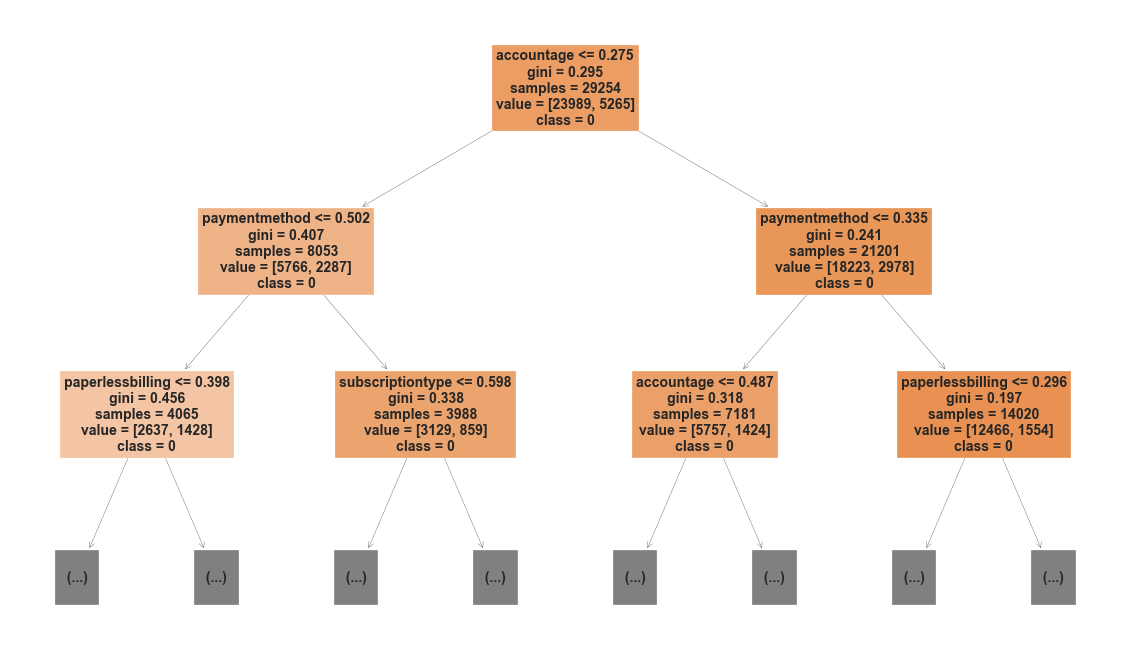

In [32]:
plt.figure(figsize=(20,12))
plot_tree(dtpipeline.named_steps.decisiontree, max_depth=2, feature_names=X.columns, class_names=['0','1'], fontsize=14, filled=True)
plt.show()

**=================================================================================================================**

In [ ]:
#preprocessor.fit_transform(X_train).columns

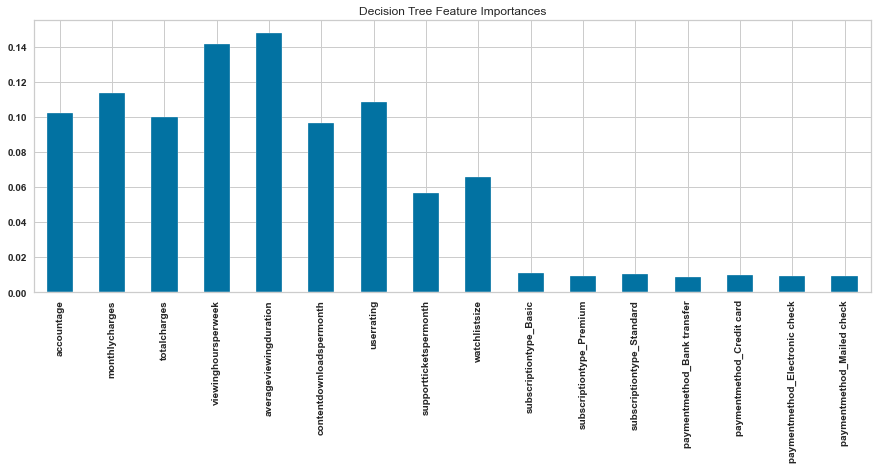

In [33]:
importances = dtpipeline.named_steps.decisiontree.feature_importances_

feature_importances = pd.Series(importances, index=preprocessor.fit_transform(X_train).columns)

fig, ax = plt.subplots()

feature_importances.plot.bar(ax=ax, figsize=(15,5))
ax.set_title("Decision Tree Feature Importances")
ax.tick_params('x', rotation=90)

fig.show()

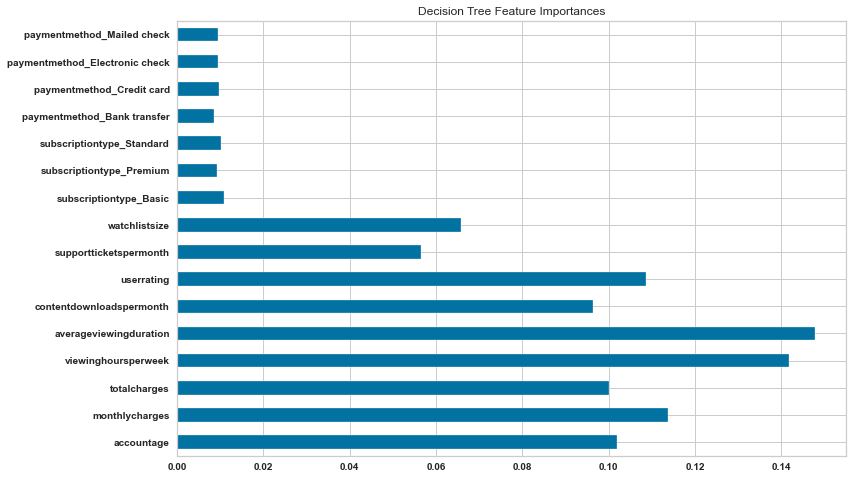

In [34]:
importances = dtpipeline.named_steps.decisiontree.feature_importances_

feature_importances = pd.Series(importances, index=preprocessor.fit_transform(X_train).columns)

fig, ax = plt.subplots()

feature_importances.plot.barh(ax=ax, figsize=(12,8))
ax.set_title("Decision Tree Feature Importances")
ax.tick_params('x', rotation=0)

fig.show()

#fig.savefig("tree.png")

In [ ]:
feature_importances_df = pd.DataFrame(feature_importances, columns=["importances"])
feature_importances_df = feature_importances_df.sort_values(by='importances')
feature_importances_df

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=feature_importances_df, x=feature_importances_df.importances, y=feature_importances_df.index, orient='h')

ax.set_title("Decision Tree: Feature Importances", fontsize=20)

ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

plt.show()

**=================================================================================================================**

## Random Forest Model

In [ ]:
rfpipeline = Pipeline(steps=[
                        ("preprocessor", preprocessor),
                        ("randomforest", RandomForestClassifier(random_state=0))
                    
])

In [ ]:
rfpipeline.fit(X_train, y_train)

In [ ]:
rfpred = rfpipeline.predict(X_test)

In [ ]:
rfpred[0:5]

In [ ]:
print("Random Tree Classifier\n")
print('Accuracy:', '%.3f' % accuracy_score(y_test, rfpred))
print('Precision:', '%.3f' % precision_score(y_test, rfpred))
print('Recall:', '%.3f' % recall_score(y_test, rfpred))
print('F1 Score:', '%.3f' % f1_score(y_test, rfpred))
print('AUC score:', '%3.f' % roc_auc_score(y_test, rfpred))

## Random Forest Model Evaluation

In [ ]:
rfcm = confusion_matrix(y_test,rfpred)
rfcm

In [ ]:
print(classification_report(y_test,rfpred))

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=rfpipeline, X=X_test, y=y_test, ax=ax, display_labels=rfpipeline.classes_)
ax.set_title('Confusion matrix of the classifier', size=15)
ax.grid(False)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=rfpipeline, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

## K-Fold Validation (RF)

In [ ]:
#kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
rfcv = cross_validate(estimator=rfpipeline, X=X_train, y=y_train, scoring="roc_auc", cv=skf, n_jobs=2, return_train_score=False)
rfcv

In [ ]:
rfcv["train_score"].mean()

In [ ]:
rfcv["test_score"].mean()

## Cross Validation Score

In [ ]:
rfcv2 = cross_val_score(estimator=rfpipeline, X=X_train, y=y_train, scoring="roc_auc", cv=skf, n_jobs=2)

In [ ]:
rfcv2

## GridSearchCV (RF)

In [ ]:
rfpipeline.named_steps.randomforest.get_params()

In [ ]:
parameters = {'randomforest__criterion': ['gini', 'entropy', 'log_loss'],
              'randomforest__ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04]
             }

In [ ]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
rfgs = GridSearchCV(estimator=rfpipeline, param_grid=parameters, scoring=scoring, n_jobs=-1, cv=5, refit='roc_auc')

In [ ]:
%%time
rfgs.fit(X_train, y_train)

In [ ]:
rfgs.best_params_

In [ ]:
rfgs.best_score_

## RandomSearchCV (RF)

In [ ]:
parameters = {'randomforest__n_estimators': stats.randint(50, 200),
              'randomforest__max_depth' : stats.randint(2,10),
              'randomforest__min_samples_split': stats.randint(2,5),
              'randomforest__min_samples_leaf' : stats.randint(1,5),
              'randomforest__ccp_alpha': stats.uniform(0,0.05)
             }

In [ ]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
rf_randm = RandomizedSearchCV(estimator=rfpipeline, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=2, scoring="roc_auc", refit=True)

In [ ]:
%%time
rf_randm.fit(X_train, y_train)

In [ ]:
rf_randm.best_estimator_

In [ ]:
bestpipeline = rf_randm.best_estimator_

In [ ]:
rf_randm.best_score_

In [ ]:
rf_randm.best_params_

In [ ]:
# we also find the data for all models evaluated

results = pd.DataFrame(rf_randm.cv_results_)

print(results.shape)

results.head()

In [ ]:
results.columns

In [ ]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[['param_randomforest__max_depth', 'param_randomforest__min_samples_leaf', 
         'param_randomforest__min_samples_split', 'param_randomforest__n_estimators',
         'mean_test_score', 'rank_test_score']].T

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_score'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
#     f1 = best_estimator_results.mean_test_f1
#     recall = best_estimator_results.mean_test_recall
#     precision = best_estimator_results.mean_test_precision
#     accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_score
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
#                         'F1': f1,
#                         'Recall': recall,
#                         'Precision': precision,
#                         'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [ ]:
# Call the function on our model
rf_result_table = make_results("Random Forest RCV", rf_randm)

rf_result_table

**=================================================================================================================**

## Feature importance (or Gini) graph

In [ ]:
importances = rfpipeline.named_steps.randomforest.feature_importances_

feature_importances = pd.Series(importances, index=preprocessor.fit_transform(X_train).columns)

fig, ax = plt.subplots()
feature_importances.sort_values(ascending=False).plot.barh(ax=ax, figsize=(12,8))

ax.set_title("Random Forest Feature Importances", size=20)
ax.tick_params('x', rotation=0)

fig.show()

In [ ]:
# feature_importances_df = pd.DataFrame(feature_importances, columns=["importances"])
# feature_importances_df = feature_importances_df.sort_values(by='importances')
# feature_importances_df

In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))

# sns.barplot(data=feature_importances_df, x=feature_importances_df.importances, y=feature_importances_df.index, orient='h')

# ax.set_title("Decision Tree: Feature Importances for Employee Leaving", fontsize=15)

# ax.set_xlabel("Importance")
# ax.set_ylabel("Feature")

# plt.show()

**=================================================================================================================**

## Permutation Importance

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

`
permutation_importance(estimator, X,  y, scoring=None, n_repeats=5,
                                   n_jobs=None, random_state=None, sample_weight=None, max_samples=1.0)
`

We need to pass the model and the validation set to the permutation_importance function.

The n_repeats parameter specifies the number of times the feature values are shuffled. More repetitions will give more accurate results, but will take longer to compute.

The random_state parameter is used to set the random seed for reproducibility.

In [ ]:
pm = permutation_importance(estimator=rfpipeline, X=X_test, y=y_test, n_jobs=-1, 
                            scoring="roc_auc", random_state=0, n_repeats=10)

pm

In [ ]:
pm2 = permutation_importance(estimator=rf_randm.best_estimator_, X=X_test, y=y_test, n_jobs=-1, 
                            scoring="roc_auc", random_state=0, n_repeats=10)

pm2

In [ ]:
sorted_idx = pm2.importances_mean.argsort()
fig = plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), pm2.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Random Forest Permutation Importance')
plt.show()

**=================================================================================================================**

## Gradient Boosting Model

In [ ]:
gbcpipeline = Pipeline(steps=[
                        ("preprocessor", preprocessor),
                        ("graboost", GradientBoostingClassifier(random_state=0))
                    
])

In [ ]:
gbcpipeline.fit(X_train, y_train)

In [ ]:
gbcpred = gbcpipeline.predict(X_test)

In [ ]:
gbcpred[0:5]

In [ ]:
print("Gradient Boost Tree Classifier\n")
print('Accuracy:', '%.3f' % accuracy_score(y_test, gbcpred))
print('Precision:', '%.3f' % precision_score(y_test, gbcpred))
print('Recall:', '%.3f' % recall_score(y_test, gbcpred))
print('F1 Score:', '%.3f' % f1_score(y_test, gbcpred))
print('AUC score:', '%3.f' % roc_auc_score(y_test, gbcpred))

## K-Fold Validation GBC

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
gbccv = cross_validate(estimator=gbcpipeline, X=X_train, y=y_train, scoring="roc_auc", cv=kf, n_jobs=2, 
                    return_train_score=False)
gbccv

In [ ]:
gbccv["train_score"].mean()

In [ ]:
gbccv["test_score"].mean()

**=================================================================================================================**

## RandomSearchCV (GBC)

In [ ]:
gbcpipeline.named_steps.graboost.get_params()

In [ ]:
parameters = {'graboost__learning_rate': stats.uniform(0,1),
              'graboost__n_estimators': stats.randint(50,250),
              'graboost__min_samples_split' : stats.uniform(0,1),
              'graboost__min_samples_leaf' : stats.uniform(0,1),
              'graboost__max_depth': stats.randint(2,10)
              
             }

In [ ]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
gbc_randm = RandomizedSearchCV(estimator=gbcpipeline, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring='roc_auc', refit=True)

In [ ]:
%%time
gbc_randm.fit(X_train, y_train)

In [ ]:
gbc_randm.best_estimator_

In [ ]:
gbc_randm.best_score_

In [ ]:
gbc_randm.best_params_

In [ ]:
# we also find the data for all models evaluated

results = pd.DataFrame(gbc_randm.cv_results_)

results.head().T

In [ ]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[['param_graboost__learning_rate','param_graboost__max_depth', 'param_graboost__min_samples_leaf',
         'param_graboost__min_samples_split','param_graboost__n_estimators']].head()

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_score'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    #f1 = best_estimator_results.mean_test_f1
    #recall = best_estimator_results.mean_test_recall
    #precision = best_estimator_results.mean_test_precision
    #accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_score
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
#                         'F1': f1,
#                         'Recall': recall,
#                         'Precision': precision,
#                         'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [ ]:
# Call the function on our model
gbc_result_table = make_results("Gradient Boosting RCV", gbc_randm)

In [ ]:
gbc_result_table

**=================================================================================================================**

## Permutation Importance

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

`
permutation_importance(estimator, X,  y, scoring=None, n_repeats=5,
                                   n_jobs=None, random_state=None, sample_weight=None, max_samples=1.0)
`

We need to pass the model and the validation set to the permutation_importance function.

The n_repeats parameter specifies the number of times the feature values are shuffled. More repetitions will give more accurate results, but will take longer to compute.

The random_state parameter is used to set the random seed for reproducibility.

**=================================================================================================================**

## HistGradientBoostingClassifier

In [ ]:
hgbcpipeline = Pipeline(steps=[
                        ("preprocessor", preprocessor),
                        ("graboost", HistGradientBoostingClassifier(random_state=0))
                    
])

### HistGradientBoosting Model

In [ ]:
hgbcpipeline.fit(X_train, y_train)

In [ ]:
hgbc_pred = hgbcpipeline.predict(X_test)

In [ ]:
# Extract the second column of probabilities (class 1) and rename it
hgbc_predicted_probability = hgbc_pred[:, 1]

hgbcprob = hgbc_predicted_probability.round(0)

hgbcprob

In [ ]:
print("HistGradientBoosting Classifier\n")
print('Accuracy:', '%.3f' % accuracy_score(y_test, hgbc_pred))
print('Precision:', '%.3f' % precision_score(y_test, hgbc_pred))
print('Recall:', '%.3f' % recall_score(y_test, hgbc_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, hgbc_pred))
print('AUC score:', '%3.f' % roc_auc_score(y_test, hgbc_pred))

In [ ]:
print("HistGradientBoosting Classifier\n")
print('Accuracy:', '%.3f' % accuracy_score(y_test, hgbcprob))
print('Precision:', '%.3f' % precision_score(y_test, hgbcprob))
print('Recall:', '%.3f' % recall_score(y_test, hgbcprob))
print('F1 Score:', '%.3f' % f1_score(y_test, hgbcprob))
print('AUC score:', '%3.f' % roc_auc_score(y_test, hgbcprob))

### K-Fold Validation

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
hgcv = cross_validate(estimator=hgbcpipeline, X=X_train, y=y_train, scoring="roc_auc", cv=skf, n_jobs=2)
hgcv

In [ ]:
hgcv["test_score"].mean()

### Using RandomSearchCV

In [ ]:
hgbcpipeline.get_params()

In [ ]:
parameters = {'graboost__l2_regularization' : stats.uniform(0,1),
              'graboost__learning_rate': stats.uniform(0,1),
              'graboost__max_bins': stats.randint(10,100),
              'graboost__max_depth': stats.randint(2,10),
              'graboost__scoring' : ['roc_auc'],
              'graboost__max_leaf_nodes' : stats.randint(2,15),
              'graboost__min_samples_leaf': stats.randint(1,20)
             }

In [ ]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
hgbc_randm = RandomizedSearchCV(estimator=hgbcpipeline, param_distributions = parameters, cv = 5, n_iter = 15, 
                           n_jobs=2, scoring='roc_auc', refit=True, return_train_score=True)

In [ ]:
%%time
hgbc_randm.fit(X_train, y_train)

In [ ]:
hgbc_randm.best_estimator_

In [ ]:
hgbc_randm.best_score_

In [ ]:
hgbc_randm.best_params_

In [ ]:
# we also find the data for all models evaluated

results = pd.DataFrame(hgbc_randm.cv_results_)

print(results.shape)

results.head()

In [ ]:
results.columns

In [ ]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[['rank_test_score', 'param_graboost__l2_regularization', 'param_graboost__learning_rate',
         'param_graboost__max_bins', 'param_graboost__max_depth', 'param_graboost__max_leaf_nodes',
         'param_graboost__min_samples_leaf', 'mean_test_score']].head()

## HGBM Model Evaluation

In [ ]:
hgbcm = confusion_matrix(y_test, hgbc_pred)
hgbcm

In [ ]:
print(classification_report(y_test, hgbc_pred))

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=hgbcpipeline, X=X_test, y=y_test, ax=ax, display_labels=hgbcpipeline.classes_)
ax.set_title('Confusion matrix of the classifier', size=15)
ax.grid(False)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=hgbcpipeline, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=20)

plt.show()

### Build a feature importance graph

In [ ]:
permimpt = permutation_importance(estimator=hgbcpipeline, X=X_train, y=y_train, scoring="roc_auc", n_repeats=5,
                       n_jobs=-1, random_state=0)

permimpt

In [ ]:
hgbc_importances = pd.Series(data=permimpt["importances_mean"], index=X.columns)
hgbc_sorted = hgbc_importances.sort_values(ascending=False)

hgbc_sorted

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(y=hgbc_sorted.index, x=hgbc_sorted.values, orient="h")

ax.set_title("Hist Gradient Boosting Features Importance", size=20)



plt.show()

In [ ]:
pm = permutation_importance(estimator=rfpipeline, X=X_test, y=y_test, n_jobs=-1, 
                            scoring="roc_auc", random_state=0, n_repeats=10)

pm

In [ ]:
pm2 = permutation_importance(estimator=hgbc_randm.best_estimator_, X=X_test, y=y_test, n_jobs=-1, 
                            scoring="roc_auc", random_state=0, n_repeats=10)

pm2

In [ ]:
sorted_idx = pm2.importances_mean.argsort()
fig = plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), pm2.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Random Forest Permutation Importance')
plt.show()

**=================================================================================================================**

### Predict Test Data Set

In [ ]:
predicted_probability = hgbcpipeline.predict_proba(testset)

In [ ]:
predicted_probability

In [ ]:
predicted_probability = predicted_probability.round(0)[:,1]
predicted_probability

In [ ]:
test_df = pd.read_csv("testoriginal.csv")

In [ ]:
test_df.head()

In [ ]:
# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [ ]:
prediction_df

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

**=================================================================================================================**

**=================================================================================================================**

## XGBoost (Scikit-Learn)

In [ ]:
xgbcpipeline = Pipeline(steps=[
                        ("preprocessor", preprocessor),
                        ("xgbc", XGBClassifier(random_state=0, objective='binary:logistic'))
                    
])

In [ ]:
xgbcpipeline.fit(X_train, y_train)

In [ ]:
xgbcpred = xgbcpipeline.predict(X_test)

In [ ]:
print("HistGradientBoosting Classifier\n")
print('Accuracy:', '%.3f' % accuracy_score(y_test, xgbcpred))
print('Precision:', '%.3f' % precision_score(y_test, xgbcpred))
print('Recall:', '%.3f' % recall_score(y_test, xgbcpred))
print('F1 Score:', '%.3f' % f1_score(y_test, xgbcpred))
print('AUC score:', '%3.f' % roc_auc_score(y_test, xgbcpred))

In [ ]:
parameters = {'max_depth': np.arange(2,10,2),
              'learning_rate': np.arange(0.1,0.5,0.1),
              'n_estimators':np.arange(50,350,50),
              'min_child_weight': [1,2,3,4,5]
             }

In [ ]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
xgbgs = GridSearchCV(estimator=xgbc,param_grid=parameters,scoring=scoring,
                     n_jobs=2, cv=5, verbose=1, refit='roc_auc', return_train_score=True)

In [ ]:
%%time
xgbgs.fit(X_random_train,y_random_train)

In [ ]:
xgbgs.best_estimator_

In [ ]:
xgbgs.best_score_

In [ ]:
xgbgs.best_params_

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [ ]:
# Create xgb model results table
xgb_cv_results = make_results('XGBoost GSCV', xgbgs)
xgb_cv_results

### Using RandomSearchCV

In [ ]:
xgbcrm = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [ ]:
#xgbcrm = XGBClassifier(random_state=0, n_estimators=100, objective='softmax:multi')

In [ ]:
parameters = {'max_depth': np.arange(2,11,1),
              'eta': [0.01, 0.1, 0.5, 1.0],
              'n_estimators': np.arange(50,300,50),
              'min_child_weight': np.arange(1,4,1),
              'gamma': np.arange(0,11,2),
              'subsample': np.arange(0.1, 0.9, 0.1),
              'colsample_bytree': np.arange(0.5,0.9,0.1),
              'reg_alpha': np.arange(0.0 , 1.0, 0.2),
              'reg_lambda': np.arange(0.0, 1.0, 0.2)
             }

In [ ]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
xgbrandm = RandomizedSearchCV(estimator=xgbcrm, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=2, scoring=scoring, refit='roc_auc')

In [ ]:
xgbrandm.fit(X_train, y_train)

In [ ]:
xgbrandm.best_estimator_

In [ ]:
xgbrandm.best_score_

In [ ]:
xgbrandm.best_params_

### XGBoost Feature importance

The XGBoost library has a function called `plot_importance`, which we imported at the beginning of this notebook. This let's us check the features selected by the model as the most predictive. We can create a plot by calling this function and passing to it the best estimator from our grid search.

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plot_importance(xgbcpipeline.named_steps.xgbc, ax=ax, title="XGB Classifier Feature Importance");

In [ ]:
xgbmodel.feature_importances_

In [ ]:
feat_importances = pd.Series(xgbmodel.feature_importances_, index=X.columns)

In [ ]:
feat_importances

In [ ]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,8))
plt.title('Feature Importances')
plt.show()

### The permutation based importance

In [ ]:
perm_importance = permutation_importance(rf,X_test,y_test, random_state=0, scoring='neg_mean_squared_error')

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.title("Permutation-based Importance")
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

**=================================================================================================================**

# Feature selection

Feature selection is the process of choosing features to be used for modeling. In practice, feature selection takes place at multiple points in the PACE process. Although sometimes you will be given a dataset and a defined target variable, most often in practice you will begin with only a question or a problem that you are tasked with solving. In these cases, if you decide that the problem requires a model, you'll then have to:

* Consider what data is available to you
* Decide on what kind of model you need
* Decide on a target variable
* Assemble a collection of features that you think might help predict on your chosen target

This would all take place during the **Plan** phase. 

Then, during the **Analyze** phase, you would perform EDA on the data and reevaluate your variables for appropriateness. For example, can your model handle null values? If not, what do you do with features with a lot of nulls? Perhaps you drop them. This too is feature selection.

But it doesn't end there. Feature selection also occurs during the **Construct** phase. This usually involves building a model, examining which features are most predictive, and then removing the unpredictive features.

There's a lot of work involved in feature selection. In our case, we already have a dataset, and we're not performing thorough EDA on it. But we can still examine the data to ensure that all the features can reasonably be expected to have predictive potential. 

# Filter Methods (Basics)

### Variance Threshold (Numeric Only)

Remember we should apply the variance filter only on numerical variables.

Default Value of Threshold is 0

    If Variance Threshold = 0 (Remove Constant Features )
    If Variance Threshold > 0 (Remove Quasi-Constant Features )


In [ ]:
# threshold_n=0.95

# vt = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))

In [ ]:
#vtfit = vt.fit(X,y)

In [ ]:
#vtfit.variances_

In [ ]:
#vt.get_support()

In [ ]:
#vt.get_feature_names_out()

### Constant and Quasi-constant features with Feature-engine

In this notebook, we will remove constant and quasi-constant features utilizing the new functionality from Feature-engine.

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
X = df.iloc[:,0:17]
y = df.iloc[:,17]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#X_train

In [ ]:
X_train.shape, X_test.shape

### Remove constant features

The DropConstantFeatures class from Feature-engine finds and removes constant and quasi-constant features from a dataset. We can remove constant features by setting the parameter tol to 1, or quasi-constant with smaller values for tol.

In [ ]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')

In [ ]:
sel.fit(X_train)

In [ ]:
# list of constant features

sel.features_to_drop_

In [ ]:
# remove constant features from the data

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

### Remove quasi-constant features

In [ ]:
sel = DropConstantFeatures(tol=0.90, variables=None, missing_values='raise') #90% majority observations

In [ ]:
sel.fit(X_train)

In [ ]:
# list of quasi-constant features

sel.features_to_drop_

In [ ]:
# percentage of observations showing each of the different values
# of the variable

var = sel.features_to_drop_[0]

X_train[var].value_counts(normalize=True)

In [ ]:
#remove the quasi-constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

### Duplicated features with Feature-engine

In this notebook, we will identify and remove duplicated features with Feature-engine.

In [ ]:
# set up the selector
sel = DropDuplicateFeatures(variables=None, missing_values='raise')

In [ ]:
# find the duplicate features, this might take a while
sel.fit(X_train)

In [ ]:
# these are the pairs of duplicated features
# each set are duplicates

sel.duplicated_feature_sets_

In [ ]:
# these are the features that will be dropped
# 1 from each of the pairs above

sel.features_to_drop_

In [ ]:
# remove the duplicated features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

# Filter Methods (Correlation)

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

### Correlation with Feature-engine

- The DropCorrelatedFeatures class from Feature-engine does a similar job to the brute force approach that we described earlier.

- The SmartCorrelationSelection allows us to select a feature from each correlated group based on model performance, number of missing values, cardinality or variance.

In [ ]:
# set up the selector

sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson',
    missing_values='ignore'
)

In [ ]:
# find correlated features

sel.fit(X_train)

In [ ]:
# each set contains a group of correlated features

sel.correlated_feature_sets_

In [ ]:
# drop correlated features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

## SmartCorrelationSelection

### Model Performance

We will keep a feature from each correlation group based on the performance of a model.

In [ ]:
lr = LinearRegression()

In [ ]:
# correlation selector
sel = SmartCorrelatedSelection(
    variables=None, # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=lr,
    scoring="neg_root_mean_squared_error",
    cv=5
)

In [ ]:
# this may take a while, because we are training
# a random forest per correlation group

sel.fit(X_train, y_train)

In [ ]:
# groups of correlated features

sel.correlated_feature_sets_

In [ ]:
X_train.shape, X_test.shape

**In this group, several features are highly correlated. Which one should we keep and which ones should we remove?**

One criteria to select which features to use from this group, would be to use those with **less missing data**. 

Our dataset contains no missing values, so this is not an option. But keep this in mind when you work with your own datasets.

**Note**

None of the 2 procedures for removing correlated features are perfect, and some correlated features may escape the loops of code. So it might be worthwhile checking that after removing the correlated features, there are no correlated features left in the dataset. If there are, repeat the procedure to remove the remaining ones.

**=================================================================================================================**

# Filter Methods (Statistical Tests)

## Mutual information

The mutual information measures the reduction in uncertainty in variable A when variable B is known. 

To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.


In [ ]:
# determine the mutual information
mi = mutual_info_classif(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.xticks(rotation=45)
plt.ylabel('Mutual Information')
plt.show()

In [ ]:
# here we will select the top 10 features
# based on their mutual information value

# select features
selkbest = SelectKBest(mutual_info_classif, k=5)

In [ ]:
selkbest.fit(X_train, y_train)

In [ ]:
# display features
X_train.columns[selkbest.get_support()]

In [ ]:
# to remove the rest of the features:

X_train = selkbest.transform(X_train)
X_test = selkbest.transform(X_test)

In [ ]:
X_train.shape, X_test.shape    # Can start training ML models

In [ ]:
# Select the features in the top percentile
selpercent = SelectPercentile(mutual_info_classif, percentile=30) # Based on no of features to decide

In [ ]:
selpercent.fit(X_train, y_train)

In [ ]:
# display the features
X_train.columns[selpercent.get_support()]

In [ ]:
# to remove the rest of the features:

X_train = selpercent.transform(X_train)
X_test = selpercent.transform(X_test)

## Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods estimate the degree of linear dependency between two random variables. In this case, any of the predictor variables and the target. 

ANOVA assumes a linear relationship between the feature and the target and that the variables follow a Gaussian distribution. If this is not true, the result of this test may not be useful.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

In [ ]:
# univariate anova
univariate = f_classif(X_train, y_train)

# plot values
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.show()

In [ ]:
# select the top 10 features
selkbest = SelectKBest(f_classif, k=5)

In [ ]:
selkbest.fit(X_train, y_train)

In [ ]:
# display selected feature names
X_train.columns[selkbest.get_support()]

In [ ]:
# to remove the rest of the features:

X_train = selpercent.transform(X_train)
X_test = selpercent.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# select features in top 10th percentile
selpercent= SelectPercentile(f_classif, percentile=30)

In [ ]:
selpercent.fit(X_train, y_train)

In [ ]:
# display selected feature names
X_train.columns[selpercent.get_support()]

In [ ]:
# to remove the rest of the features:

X_train = selpercent.transform(X_train)
X_test = selpercent.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

**=================================================================================================================**

# Filter Methods (Other Methods)

## Univariate Performance with Feature-engine

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

The C value in Logistic Regression is an user adjustable parameter that controls regularisation. In simple terms, higher values of C will instruct our model to fit the training set as best as possible, while lower C values will favour a simple models with coefficients closer to zero.


In [ ]:
# set up the machine learning model
# lr = LogisticRegression(penalty='l2', C=1000, random_state=0, solver='lbfgs', max_iter=1000)

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=gbc,
    scoring="roc_auc",
    cv=5,
    threshold=0.5
)

In [ ]:
# find predictive features
sel.fit(X_train, y_train)

In [ ]:
# find predictive features
sel.fit(X_random_train, y_random_train)

In [ ]:
# the transformer stores a dictionary of feature:metric pairs
# notice that the roc can be positive or negative.
# the selector selects based on the absolute value

#In general, an AUC of 0.5 suggests no discrimination 
#(i.e., ability to diagnose patients with and without the disease or condition based on the test), 
#0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

sel.feature_performance_

In [ ]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features', size=15)
plt.xticks(rotation=45)
plt.ylabel('ROC Score')
plt.show()

In [ ]:
# same plot but taking the absolute value of the r2

# np.abs(pd.Series(sel.feature_performance_)).sort_values(ascending=False).plot.bar(figsize=(20, 5))
# plt.title('Performance of ML models trained with individual features', size=15)
# plt.ylabel('ROC Score')
# plt.show()

In [ ]:
# the features that will be removed

sel.features_to_drop_

In [ ]:
# select features in the dataframes

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_train.columns

**=================================================================================================================**

# Step forward feature selection

Step forward feature selection starts by training a machine learning model for each feature in the dataset and selecting, as the starting feature, the one that returns the best performing model according to the evaluation criteria we choose.

In the second step, it creates machine learning models for all combinations of the feature selected in the previous step and a second feature. It selects the pair that produces the best performing algorithm.

It continues by adding 1 feature at a time to the features that were selected in previous steps, until a stopping criteria is reached.

In theory, models with more features perform better. The algorithm will continue adding new features until a certain criteria is met. For example, until the model performance does not increase beyond a certain threshold. Or, as we show in this notebook, until a certain number of features are selected.

The model performance metric can be the roc_auc for classification and the r squared for regression, for example, and it is determined by the user. 

Step forward feature selection is called a greedy procedure because it evaluates many possible single, double, triple, and so on feature combinations. Therefore, it is very computationally expensive and, sometimes, if the feature space is big enough, even unfeasible.

Scikit-learn provides various stopping criteria to stop the search:

* when a certain number of features is reached (like MLXtend) (arbitrary)
* if the performance does not increase beyond a certain threshold (ideal but expensive)
* selects half of the features (arbitrary)

### Step Forward Feature Selection Regression

In [ ]:
df = pd.read_csv("carpricemod.csv")

In [ ]:
df.shape

In [ ]:
df.head(1)

In [ ]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# within the SFS we indicate:

# 1) the algorithm we want to create, in this case RandomForests
# (note that I use few trees to speed things up)

# 2) the stopping criteria: see sklearn documentation for more details

# 3) whether to perform step forward or step backward

# 4) the evaluation metric: in this case the roc_auc
# 5) the cross-validation

# this is going to take a while, do not despair

sfs = SFS(estimator=LinearRegression(), 
          n_features_to_select=6,
          direction='forward',
          scoring='r2',
          cv=5,
          n_jobs=-1)

In [ ]:
sfs = sfs.fit(X_train, y_train)

In [ ]:
sfs.get_feature_names_out()

In [ ]:
sfs.n_features_to_select

### Step Forward Feature Selection Classification

In [ ]:
#df = pd.read_csv(".csv")

In [ ]:
df.shape

In [ ]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# within the SFS we indicate:

# 1) the algorithm we want to create, in this case RandomForests
# (note that I use few trees to speed things up)

# 2) the stopping criteria: see sklearn documentation for more details

# 3) whether to perform step forward or step backward

# 4) the evaluation metric: in this case the roc_auc
# 5) the cross-validation

# this is going to take a while, do not despair

sfs = SFS(estimator=LogisticRegression(random_state=0), 
          n_features_to_select=4,
          direction='forward',
          scoring='f1',
          cv=5,
          n_jobs=-1)

In [ ]:
sfs = sfs.fit(X_train, y_train)

In [ ]:
sfs.get_feature_names_out()

# Step backward feature selection

Step Backward Feature Selection starts by fitting a model using all the features in the data set and determining its performance. 

Then, it trains models on all possible combinations of all features, minus one, and removes the feature that returns the model with the lowest performance.

In the third step, it trains models in all possible combinations of the features remaining from step 2, minus 1 feature, and removes the feature that produced the lowest performing model.

The algorithm stops when a certain criteria determined by the user is met. This criteria could be that the model performance does not decrease beyond a certain threshold, or alternatively, as we show in this notebook, when we reach a certain number of selected features.

The evaluation metric can be the roc_auc for classification or the r squared for regression, for example, and is determined by the user.

Step Backward Feature Selection is called greedy because it evaluates all possible n, and then n-1 and n-2 and so on feature combinations. Therefore, it is very computationally expensive and sometimes, if the feature space is big enough, even unfeasible.

Scikit-learn provides various stopping criteria to stop the search:

* when a certain number of features is reached (like MLXtend) (arbitrary)
* if the performance does not increase beyond a certain threshold (ideal but expensive)
* selects half of the features (arbitrary)

### Step Forward Feature Selection Regression

In [ ]:
df = pd.read_csv(".csv")

In [ ]:
df.shape

In [ ]:
df.head(1)

In [ ]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# within the SFS we indicate:

# 1) the algorithm we want to create, in this case RandomForests
# (note that I use few trees to speed things up)

# 2) the stopping criteria: see sklearn documentation for more details

# 3) whether to perform step forward or step backward

# 4) the evaluation metric: in this case the roc_auc
# 5) the cross-validation

# this is going to take a while, do not despair

sfs = SFS(estimator=LinearRegression(), 
          n_features_to_select=6,
          direction='backward',
          scoring='r2',
          cv=5,
          n_jobs=-1)

In [ ]:
sfs = sfs.fit(X_train, y_train)

In [ ]:
sfs.get_feature_names_out()

In [ ]:
sfs.n_features_to_select

### Step Backward Feature Selection Classification

In [ ]:
#df = pd.read_csv(".csv")

In [ ]:
df.shape

In [ ]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# within the SFS we indicate:

# 1) the algorithm we want to create, in this case RandomForests
# (note that I use few trees to speed things up)

# 2) the stopping criteria: see sklearn documentation for more details

# 3) whether to perform step forward or step backward

# 4) the evaluation metric: in this case the roc_auc
# 5) the cross-validation

# this is going to take a while, do not despair

sfs = SFS(estimator=LogisticRegression(random_state=0), 
          n_features_to_select=4,
          direction='backward',
          scoring='f1',
          cv=5,
          n_jobs=-1)

In [ ]:
sfs = sfs.fit(X_train, y_train)

In [ ]:
sfs.get_feature_names_out()

**=================================================================================================================**

**=================================================================================================================**

# Pickle  

When models take a long time to fit, you don’t want to have to fit them more than once. If your kernel disconnects or you shut down the notebook and lose the cell’s output, you’ll have to refit the model, which can be frustrating and time-consuming. 

`pickle` is a tool that saves the fit model object to a specified location, then quickly reads it back in. It also allows you to use models that were fit somewhere else, without having to train them yourself.

### Save the Model
This step will ***W***rite (i.e., save) the model, in ***B***inary (hence, `wb`), to the folder designated by the above path. In this case, the name of the file we're writing is `rf_cv_model.pickle`.

In [ ]:
filename = 'model.sav'
dump(xgbnew,open(filename,'wb'))

Once we save the model, we'll never have to re-fit it when we run this notebook. Ideally, we could open the notebook, select "Run all," and the cells would run successfully all the way to the end without any model retraining. 

For this to happen, we'll need to return to the cell where we defined our grid search and comment out the line where we fit the model. Otherwise, when we re-run the notebook, it would refit the model. 

Similarly, we'll also need to go back to where we saved the model as a pickle and comment out those lines.  

Next, we'll add a new cell that reads in the saved model from the folder we already specified. For this, we'll use `rb` (read binary) and be sure to assign the model to the same variable name as we used above, `rf_cv`.

### Load the Model

In [ ]:
loaded_model = load(open(filename,'rb'))

In [ ]:
loaded_model

**=================================================================================================================**

#### Python code done by Dennis Lam